Importing dependencies

In [1]:
import tradingeconomics as te
import time
import matplotlib.pyplot as plt
import sys
import os

API authentication

In [2]:
sys.path.insert(1, os.path.join(sys.path[0], '..'))
from helper import get_api_key

te.login(get_api_key())

'You are logged in as a 10D377002D63488:6E8511E3FE804EC'

Importing data

In [3]:
elders = te.getWBIndicator(series_code='SP.POP.65UP.TO.ZS', output_type='df')
time.sleep(1)

covid_deaths = te.getIndicatorData(country='all', indicators='coronavirus deaths', output_type='df')
time.sleep(1)

population = te.getIndicatorData(country='all', indicators='population', output_type='df')

Data manipulation

In [4]:
elders = elders[['country', 'last']].rename(columns={'last': 'Elders (% of total)', 'country': 'Country'}).set_index('Country')
covid_deaths = covid_deaths[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Deaths'}).set_index('Country')
population = population[['Country', 'LatestValue']].rename(columns={'LatestValue': 'Population'}).set_index('Country')

df = covid_deaths.join(elders).join(population)

df['Deaths per 10.000 people'] = df['Deaths']/(df['Population']*100)
df = df[['Deaths per 10.000 people', 'Elders (% of total)']]
df.dropna(inplace=True)

df.sort_values(['Deaths per 10.000 people', 'Elders (% of total)'], ascending=False, inplace=True)
df = df.head(20)
df

,Deaths per 10.000 people,Elders (% of total)
Country,,
Belgium,15.276614,19.00657
Peru,11.176615,8.39348
Italy,10.228463,23.01214
Spain,9.937367,19.64782
United Kingdom,9.387247,18.50870
Argentina,8.902759,11.24311
Montenegro,8.854839,15.38917
Bosnia and Herzegovina,8.853448,17.20115
Mexico,8.759204,7.41666


Plotting

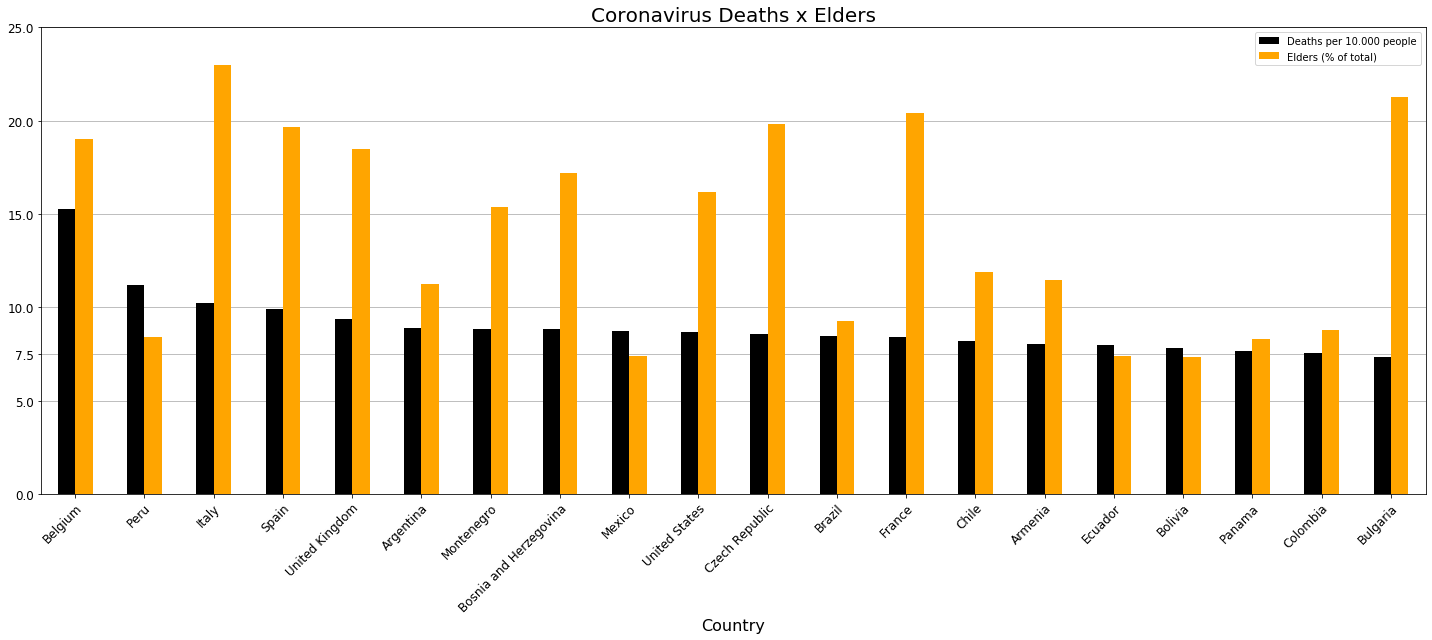

In [5]:
color_dict = {'Elders (% of total)': 'orange', 'Deaths per 10.000 people': 'black'}

df.plot(
    figsize=(20, 9),
    kind='bar',
    zorder=3,
    color=[color_dict.get(x, '#333333') for x in df.columns],
    fontsize=12
)

ax = plt.gca()

plt.setp(
    ax.get_xticklabels(),
    rotation=45,
    ha='right',
    rotation_mode='anchor',
    fontsize=12
)

plt.yticks(list(plt.yticks()[0]) + [7.5])
ax.yaxis.grid(zorder=0)
ax.set_title('Coronavirus Deaths x Elders', color='black', size=20)
plt.xlabel('Country', fontsize=16)
plt.tight_layout()